Mini Project -- Credit Card Fraud Detection using Machine Learning

In [7]:
import tensorflow as tf 
from tensorflow.keras import Sequential    
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D 
from tensorflow.keras.optimizers import Adam   
from sklearn.metrics import confusion_matrix
import seaborn 
from sklearn import svm

In [8]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt  
%matplotlib inline  

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  

Gathering the data and assessing the data

In [10]:
df = pd.read_csv('E:/Rajesh Singla/OneDrive - Graphic Era University/Desktop/Mini Project/New folder/creditcard.csv/creditcard.csv')  

In [11]:
df.head()    

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.shape 

(284807, 31)

In [13]:
df.info()  # concise summary of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
df.Class.unique()   # in column 

array([0, 1], dtype=int64)

Uneven class distribution

In [15]:
df.Class.value_counts()    # no times each unique class appearing

0    284315
1       492
Name: Class, dtype: int64

In [16]:
nf = df[df.Class==0]    # return the boolean series dataframe and is true if value(class) = zero
f = df[df.Class==1]

In [17]:
nf = nf.sample(738) # rsampling

Creating new dataframe

In [18]:
data = f.append(nf,ignore_index=True) # append the contents

In [19]:
data.shape #number of rows and columns 

(1230, 31)

In [20]:
X = data.drop(['Class'],axis=1)    # axis h(1) and v (0) specifies that the row or column will be dropped accordingly
y=data['Class']  

Train-Test Split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)  # used to split the data  , class distribution is maintained in the split sets 

In [22]:
X_train.shape,X_test.shape

((984, 30), (246, 30))

Applying StandardScaler to obtain all the features in similar scale. (Improvements)

In [23]:

scaler=StandardScaler()   # creating an instance of the stdscaler so that zero mean and unit variance 
X_train=scaler.fit_transform(X_train)  # calculates m and stddev and performs stdize transfo
X_test=scaler.transform(X_test)  

In [24]:
y_train=y_train.to_numpy()  
y_test=y_test.to_numpy()

Input Reshaping

In [25]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)   
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

# CNN 

In [26]:
model= Sequential()   # Creation 
model.add(Conv1D(32,2,activation='relu',input_shape=X_train[0].shape))  # add a convolutional layer  (filter, kernel size, activation functiona nd the input shape )
model.add(BatchNormalization()) 
model.add(Dropout(0.2))  # dropout layer that 20% of the input units during training ans is used to prevent overfitting  

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())    
model.add(Dropout(0.5))

model.add(Flatten()) # flatten the output of the convolutional layer because the next layer is a dense layer
model.add(Dense(64,activation='relu'))  # connects the conv layer to the olayer (64 units)
model.add(Dropout(0.5)) # input units dropped 

model.add(Dense(1,activation='sigmoid'))  # output layer that is used to make the predictions  (Sigmoid usage due to binary classification)

In [27]:
model.summary() # whole summary of the model 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

Compiling and Fitting

In [28]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy']) # (optimizer, binary classification, Fraction of correctly measured samples)

In [29]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test)) # trains the model and returns History object which contains the info about training process such as loss and accuracy at each epoch

Epoch 1/20


31/31 [==============================] - 12s 61ms/step - loss: 0.6802 - accuracy: 0.7327 - val_loss: 0.5847 - val_accuracy: 0.9350
Epoch 2/20
31/31 [==============================] - 1s 29ms/step - loss: 0.4307 - accuracy: 0.8404 - val_loss: 0.5285 - val_accuracy: 0.9390
Epoch 3/20
31/31 [==============================] - 1s 20ms/step - loss: 0.3711 - accuracy: 0.8720 - val_loss: 0.4946 - val_accuracy: 0.9553
Epoch 4/20
31/31 [==============================] - 1s 27ms/step - loss: 0.3153 - accuracy: 0.8923 - val_loss: 0.4535 - val_accuracy: 0.9634
Epoch 5/20
31/31 [==============================] - 1s 24ms/step - loss: 0.3119 - accuracy: 0.8994 - val_loss: 0.4110 - val_accuracy: 0.9675
Epoch 6/20
31/31 [==============================] - 1s 20ms/step - loss: 0.2486 - accuracy: 0.9096 - val_loss: 0.3821 - val_accuracy: 0.9675
Epoch 7/20
31/31 [==============================] - 1s 25ms/step - loss: 0.2660 - accuracy: 0.9085 - val_loss: 0.3686 - val_accuracy: 0.9675
Epoch 8/20
31/31 [=====

In [30]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

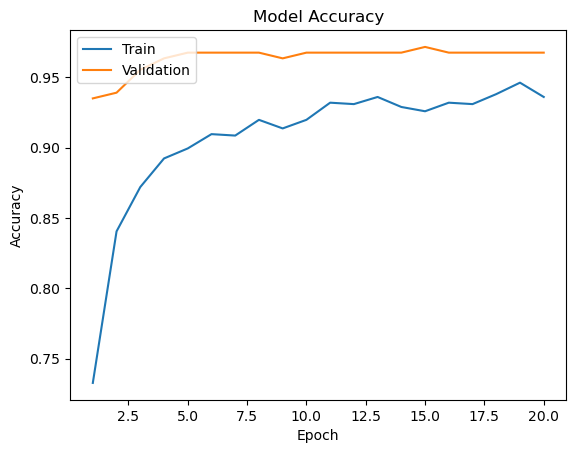

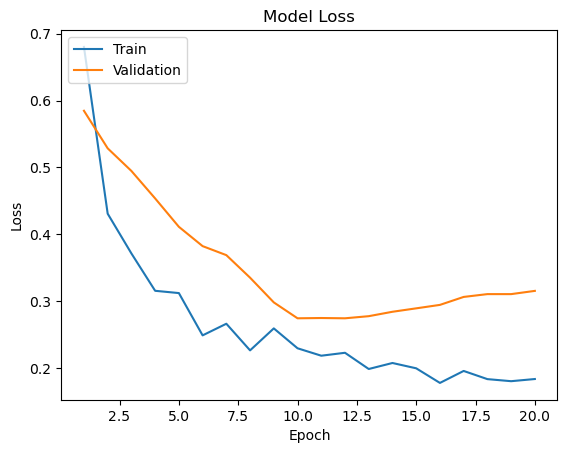

In [31]:
plotLearningCurve(history,20)

In [32]:
df_corr = df.corr() # calculates the correlation coefficient --> measure of the linear relationship between the two variables

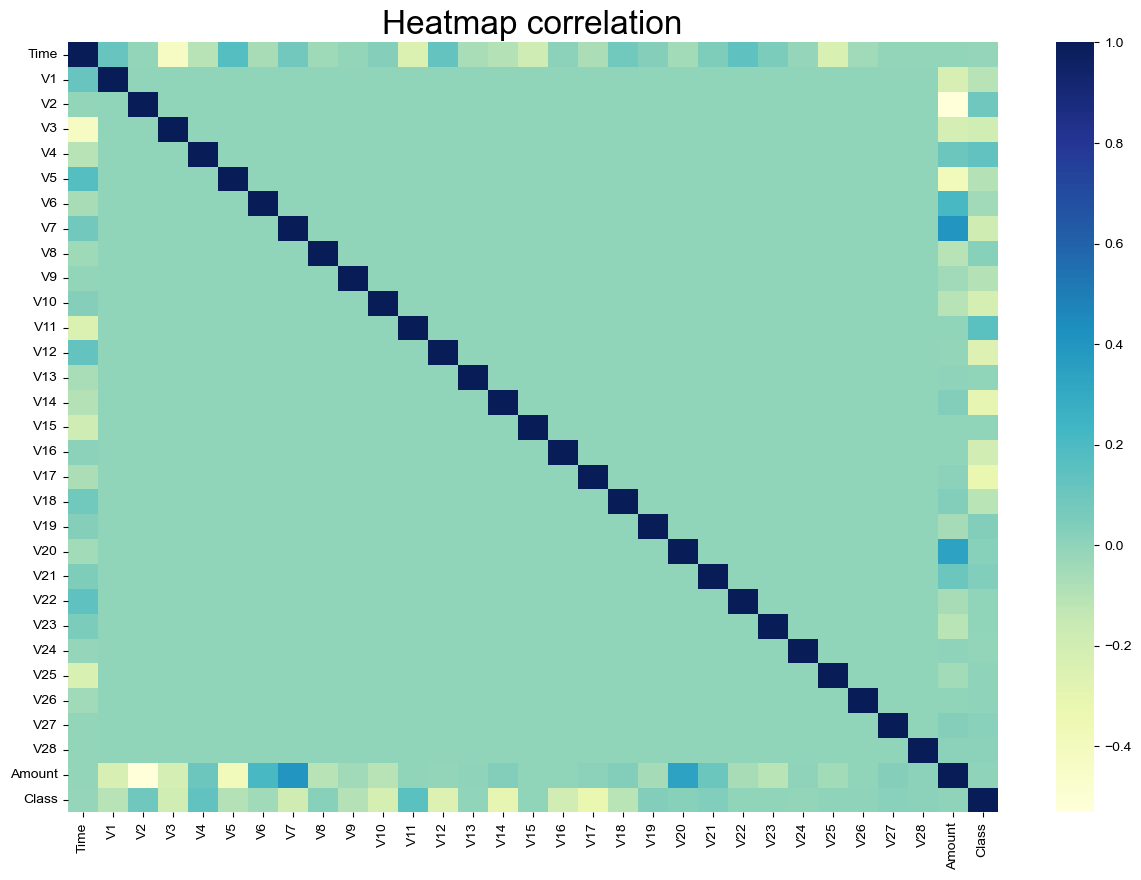

In [33]:
plt.figure(figsize=(15,10))  # width and height of the figure in inches 
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [34]:
rank = df_corr['Class'] # Retrieving the correlation coefficients per feature in relation to the feature class
df_rank = pd.DataFrame(rank) 
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) # calculates the absolute values of correlation coefficients and sorts in descending order 
df_rank.dropna(inplace=True) 

In [35]:
df_train_all = df[0:150000] # We cut in two the original dataset
df_train_1 = df_train_all[df_train_all['Class'] == 1] # Fraudulent 
df_train_0 = df_train_all[df_train_all['Class'] == 0] 
print('In this dataset, we have ' + str(len(df_train_1)) +" frauds so we need to take a similar number of non-fraud")

df_sample=df_train_0.sample(300)
df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds. 
df_train = df_train.sample(frac=1) # Then we mix our dataset

In this dataset, we have 293 frauds so we need to take a similar number of non-fraud


In [36]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = df_train['Class'] # We create our label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [37]:
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']   #creates a new dataframe having only the class column  
X_test_all = np.asarray(X_test_all)   # converts the dataframe to a numpy array
y_test_all = np.asarray(y_test_all)

In [38]:
X_train_rank = df_train[df_rank.index[1:11]] # We take the first ten ranked features
X_train_rank = np.asarray(X_train_rank) 

In [39]:
# based on the indices stored in df rank, these extract a subset of columns from the dataframe
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank) 
y_test_all = np.asarray(y_test_all)

In [40]:
class_names=np.array(['0','1']) # Assigning the Binary label, Class = 1 (fraud) and Class = 0 (no fraud)

In [41]:
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [42]:
classifier = svm.SVC(kernel='linear') # binary classification problems

In [43]:
classifier.fit(X_train, y_train) # on training data

SVC(kernel='linear')

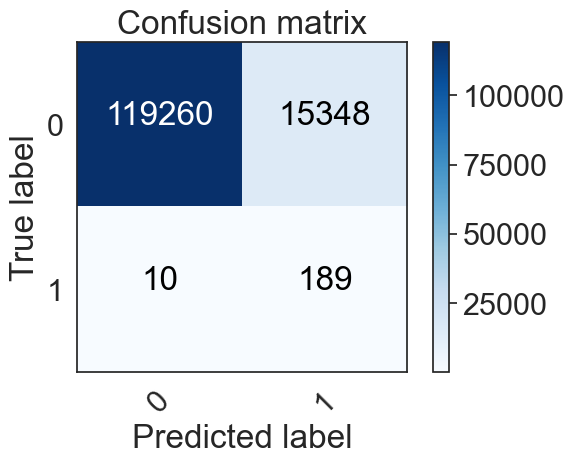

In [44]:
prediction_SVM_all = classifier.predict(X_test_all)  # to make predictions on the parametrised data and reslut is stored 
cm = confusion_matrix(y_test_all, prediction_SVM_all) # using predicted labels and the true labels 
plot_confusion_matrix(cm,class_names)  # plotting the confusion matrix using the cm and the names of the classes and displays it.

In [45]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))  # accuracy, weighted accuracy and the average measure 

Our criterion give a result of 0.9370138280325049


In [46]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 189 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.949748743718593
the accuracy is : 0.8860741652881526


In [47]:
classifier.fit(X_train_rank, y_train) # Then we train our model, with our balanced data train.
prediction_SVM = classifier.predict(X_test_all_rank) #And finally, we predict our data test.

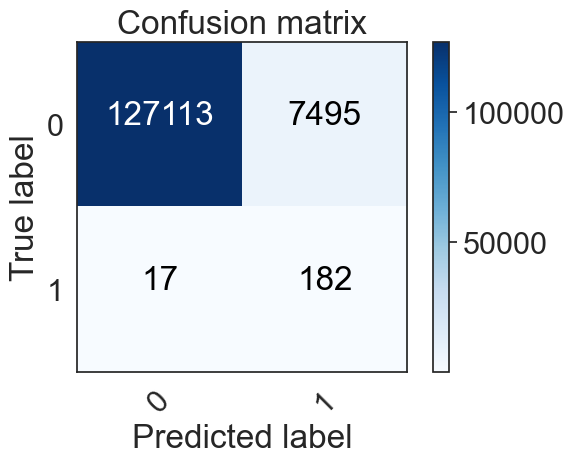

In [48]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [49]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9205134696008546


In [50]:
print('Now, We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

Now, We have detected 182 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.914572864321608
the accuracy is : 0.944275890717841


In [51]:
classifier_b = svm.SVC(kernel='linear',class_weight={0:0.60, 1:0.40})

In [52]:
classifier_b.fit(X_train, y_train) 

SVC(class_weight={0: 0.6, 1: 0.4}, kernel='linear')

In [53]:
# Testing the model 
prediction_SVM_b_all = classifier_b.predict(X_test_all)

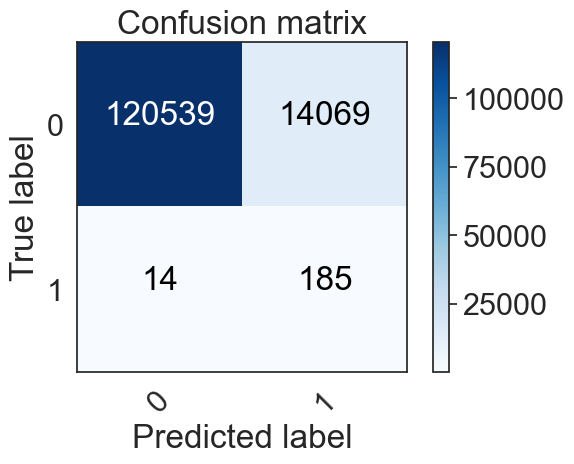

In [54]:
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [55]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9228250191889817


In [56]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 185 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9296482412060302
the accuracy is : 0.8955321311207874


In [57]:
# Models Rank
classifier_b.fit(X_train_rank, y_train) # Then we train our model, with our balanced data train.
prediction_SVM = classifier_b.predict(X_test_all_rank)

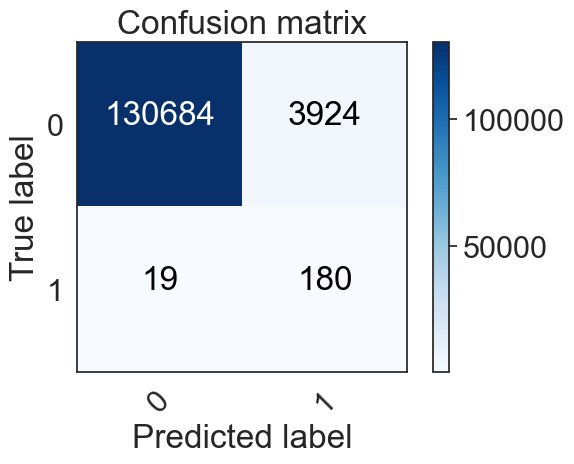

In [58]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [59]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9177682458596215


In [60]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 180 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9045226130653267
the accuracy is : 0.9707507770368008
